In [2998]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2999]:
file1 = pd.read_csv('observations.csv')
file2 = pd.read_csv('species_info.csv')
file1_2 = glob.glob('*.csv')
files = [pd.read_csv(filename) for filename in file1_2]
file3 = pd.concat(files)

In [3000]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [3001]:
file1.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3002]:
print(f'''There are {file1.park_name.nunique()} unique area under examination and these are as follows:
{file1.park_name.unique()}''')

There are 4 unique area under examination and these are as follows:
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [3003]:
file1.park_name.replace('Great Smoky Mountains National Park', 'Great Smoky', inplace=True)
file1.park_name.replace('Yosemite National Park', 'Yosemite', inplace=True)
file1.park_name.replace('Bryce National Park', 'Bryce', inplace=True)
file1.park_name.replace('Yellowstone National Park', 'Yellowstone', inplace=True)

In [3004]:
file1[file1.park_name == 'Great Smoky']['observations'].mean()

74.14491758241758

In [3005]:
avg_animal = file1[['park_name', 'observations']].groupby('park_name').mean().reset_index()

In [3006]:
avg_animal

,park_name,observations
0,Bryce,98.905391
1,Great Smoky,74.144918
2,Yellowstone,247.864354
3,Yosemite,148.236951


In [3007]:
total_animal = file1[['park_name', 'observations']].groupby('park_name').sum().reset_index()

In [3008]:
total_animal

,park_name,observations
0,Bryce,576025
1,Great Smoky,431820
2,Yellowstone,1443562
3,Yosemite,863332


In [3009]:
total_animal['proportions'] = np.round(total_animal.observations*100 / total_animal.observations.sum(), 2)

In [3010]:
total_animal

,park_name,observations,proportions
0,Bryce,576025,17.38
1,Great Smoky,431820,13.03
2,Yellowstone,1443562,43.55
3,Yosemite,863332,26.05


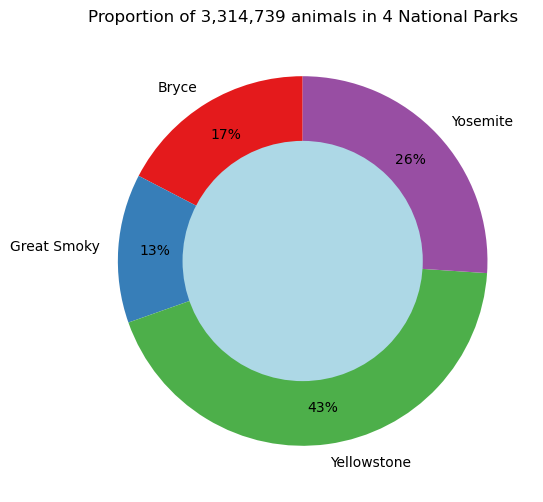

<Figure size 640x480 with 0 Axes>

In [3011]:
plt.figure(figsize=[12, 6])
sns.set_palette('Set1')
plt.pie(total_animal['observations'], autopct='%d%%', startangle=90, labels=total_animal.park_name, pctdistance=0.8)
plt.title(f'Proportion of {total_animal.observations.sum():,} animals in {len(total_animal.park_name)} National Parks')
hole = plt.Circle((0, 0), 0.65, facecolor='lightblue')
plt.gcf().gca().add_artist(hole)
plt.savefig('donut_animals_parks.png')
plt.show()
plt.clf()

In [3012]:
print('''Result: You can see above in the donut chart that more than 2 thirds of the animals living in Yellowstone and Yosemite National Parks
while only '30%' live in the other two Parks. Morover almost half of the animals in the examination is from Yellowstone.''')

Result: You can see above in the donut chart that more than 2 thirds of the animals living in Yellowstone and Yosemite National Parks
while only '30%' live in the other two Parks. Morover almost half of the animals in the examination is from Yellowstone.


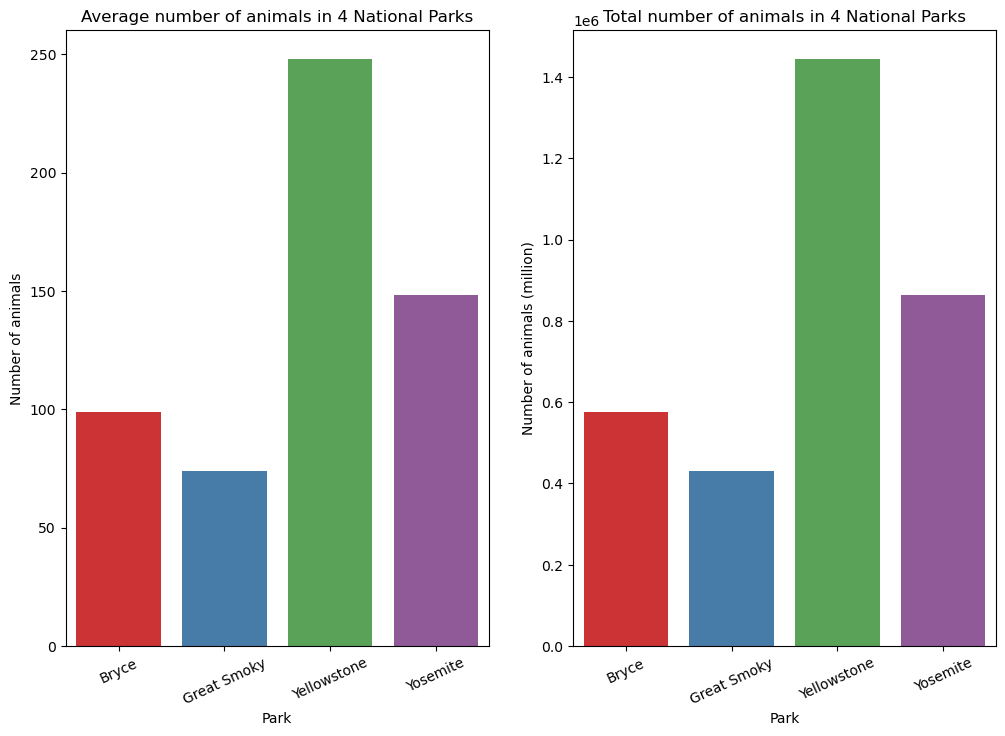

<Figure size 640x480 with 0 Axes>

In [3013]:
plt.figure(figsize=[12, 8])
plt.subplot(1,2,1)
sns.barplot(x='park_name', y='observations', data=avg_animal)
plt.title(f'Average number of animals in {avg_animal.park_name.nunique()} National Parks')
plt.xlabel('Park')
plt.ylabel('Number of animals')
plt.xticks(rotation=25)
plt.subplot(1,2,2)
sns.barplot(x='park_name', y='observations', data=total_animal)
plt.title(f'Total number of animals in {total_animal.park_name.nunique()} National Parks')
plt.xlabel('Park')
plt.ylabel('Number of animals (million)')
plt.xticks(rotation=25)
plt.savefig('bars_animals_parks.png')
plt.show()
plt.clf()

In [3014]:
print('''Result: You can see that the lowest average animal number relates to Great Smokey and the highest belongs to Yellowstone.
It seems that the research focused on Yellowstone and Yosemite, but at this time we cannot be sure, because an observation can 
include 0 and 500 animals for example and we do not know anything about the numbers of the observations successively.''')

Result: You can see that the lowest average animal number relates to Great Smokey and the highest belongs to Yellowstone.
It seems that the research focused on Yellowstone and Yosemite, but at this time we cannot be sure, because an observation can 
include 0 and 500 animals for example and we do not know anything about the numbers of the observations successively.


In [3015]:
print(f'There are {len(file1.observations):,} observations including {file1.observations.sum():,} animals total in the sample')

There are 23,296 observations including 3,314,739 animals total in the sample


In [3016]:
print(f'There are {file1.scientific_name.nunique()} species among the animals')

There are 5541 species among the animals


In [3017]:
print(f'The max number of animals in one observation is {file1.observations.max()}')
print(f'The min number of animals in one observation is {file1.observations.min()}')
print(f'The average number of animals in one observation is {int(file1.observations.mean())}')

The max number of animals in one observation is 321
The min number of animals in one observation is 9
The average number of animals in one observation is 142


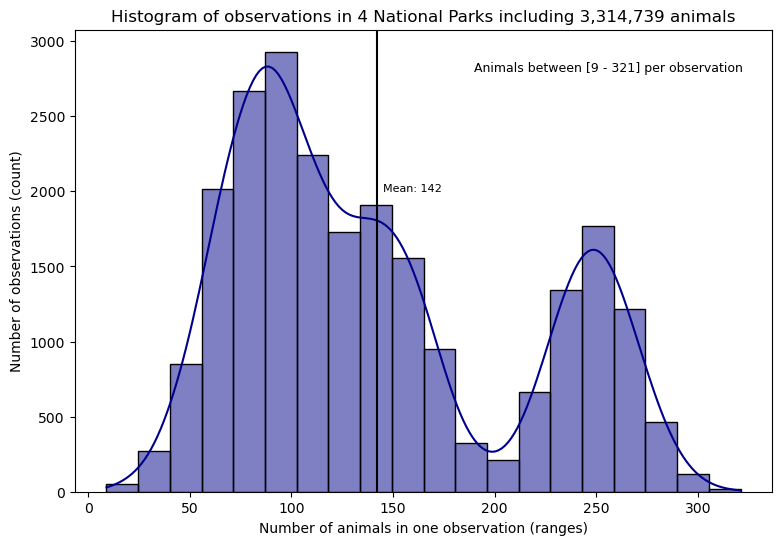

<Figure size 640x480 with 0 Axes>

In [3018]:
plt.figure(figsize=[9, 6])
sns.histplot(file1.observations, kde=True, bins=20, color='darkblue')
plt.title(f'Histogram of observations in {file1.park_name.nunique()} National Parks including {file1.observations.sum():,} animals')
plt.xlabel('Number of animals in one observation (ranges)')
plt.ylabel('Number of observations (count)')
plt.text(x=190, y=2800, s=f'''Animals between [{file1.observations.min()} - {file1.observations.max()}] per observation''',
fontsize=9)
plt.axvline(np.mean(file1.observations), color='black')
plt.text(x=145, y=2000, s=f'Mean: {int(file1.observations.mean())}', fontsize=8)
plt.savefig('hist_observs.png')
plt.show()
plt.clf()

In [3019]:
print('''Result: You can see that there are 2 peaks in this distribution, meaning that the highest number of observations
have 2 occurences at around 85 animals and 250 animals. Let us examine where are those observations!''')

Result: You can see that there are 2 peaks in this distribution, meaning that the highest number of observations
have 2 occurences at around 85 animals and 250 animals. Let us examine where are those observations!


In [3020]:
print('First we calculate the number of observations in the Parks successively.')

First we calculate the number of observations in the Parks successively.


In [3021]:
park1 = file1[file1.park_name == 'Great Smoky']
park2 = file1[file1.park_name == 'Yosemite']
park3 = file1[file1.park_name == 'Bryce']
park4 = file1[file1.park_name == 'Yellowstone']

In [3022]:
park_all = [park1, park2, park3, park4]

In [3023]:
for park in park_all:
    print(f'The number of observations in {park.park_name.unique()} Park is {len(park.observations)}')

The number of observations in ['Great Smoky'] Park is 5824
The number of observations in ['Yosemite'] Park is 5824
The number of observations in ['Bryce'] Park is 5824
The number of observations in ['Yellowstone'] Park is 5824


In [3024]:
print('''Final result: The number of observations is exactly the same in every Park. It means that the majority of the 
observations below 85 animals is related to the Great Smokey Park because of having the lowest average animal number
in one observation, and because of the existence of the other observations of other Parks.

On the other hand observations with more than 150 animals mostly related to the Yellowstone because we calculated the highest mean of
animals among the 4 Parks in that case and there is a relative big difference between the average animal number of Yellostone and Yosemite.
It was worth doing some math, and we can also find the min and the max animal numbers of every Park, but that is not a must.''')

Final result: The number of observations is exactly the same in every Park. It means that the majority of the 
observations below 85 animals is related to the Great Smokey Park because of having the lowest average animal number
in one observation, and because of the existence of the other observations of other Parks.

On the other hand observations with more than 150 animals mostly related to the Yellowstone because we calculated the highest mean of
animals among the 4 Parks in that case and there is a relative big difference between the average animal number of Yellostone and Yosemite.
It was worth doing some math, and we can also find the min and the max animal numbers of every Park, but that is not a must.


In [3025]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [3026]:
file2.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3027]:
file2.nunique()

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64

In [3028]:
file2.scientific_name.nunique() == file1.scientific_name.nunique()

True

In [3029]:
len(file2.scientific_name) - file2.scientific_name.nunique()

283

In [3030]:
file2.duplicated(subset='scientific_name').value_counts()

C:\Users\stank\AppData\Roaming\Python\Python310\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


False    5541
True      283
dtype: int64

In [3031]:
file2.duplicated(subset='scientific_name').value_counts().loc[True]

283

In [3032]:
file2 = file2.drop_duplicates(subset='scientific_name')

In [3033]:
file2.duplicated(subset='scientific_name').value_counts()

False    5541
dtype: int64

In [3034]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  178 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


In [3035]:
file2.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [3036]:
concerned_species = file2[~file2.conservation_status.isna()].reset_index()

In [3037]:
concerned_species

,index,category,scientific_name,common_names,conservation_status
0,7,Mammal,Canis latrans,Coyote,Species of Concern
1,8,Mammal,Canis lupus,Gray Wolf,Endangered
2,9,Mammal,Canis rufus,Red Wolf,Endangered
3,29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
4,30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
...,...,...,...,...,...
173,5302,Vascular Plant,Callitriche marginata,Winged Water-Starwort,Species of Concern
174,5399,Vascular Plant,Camissonia sierrae ssp. alticola,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
175,5426,Vascular Plant,Epilobium oreganum,"Grants Pass Willowherb, Oregon Fireweed",Species of Concern
176,5436,Vascular Plant,Botrychium ascendens,"Trianglelobe Moonwort, Upswept Moonwort",Species of Concern


In [3038]:
concerned_species['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [3039]:
concerned_species['conservation_status'].unique()

array(['Species of Concern', 'Endangered', 'Threatened', 'In Recovery'],
      dtype=object)

In [3040]:
print(f'The number of "concerned" species is {len(file2.scientific_name[~file2.conservation_status.isna()])}')

The number of "concerned" species is 178


In [3041]:
print('Or {}, or {}'.format(concerned_species.scientific_name.nunique(), len(concerned_species.scientific_name)))

Or 178, or 178


In [3042]:
newdf = file1.merge(concerned_species, how='left')

In [3043]:
newdf.head()

,scientific_name,park_name,observations,index,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky,68,NaN,NaN,NaN,NaN
1,Neovison vison,Great Smoky,77,NaN,NaN,NaN,NaN
2,Prunus subcordata,Yosemite,138,NaN,NaN,NaN,NaN
3,Abutilon theophrasti,Bryce,84,NaN,NaN,NaN,NaN
4,Githopsis specularioides,Great Smoky,85,NaN,NaN,NaN,NaN


In [3044]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23296 entries, 0 to 23295
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   scientific_name      23296 non-null  object 
 1   park_name            23296 non-null  object 
 2   observations         23296 non-null  int64  
 3   index                760 non-null    float64
 4   category             760 non-null    object 
 5   common_names         760 non-null    object 
 6   conservation_status  760 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ MB


In [3045]:
newdf_values = newdf[~newdf.index.isna() & ~newdf.category.isna() & ~newdf.common_names.isna() & ~newdf.conservation_status.isna()].reset_index()

In [3046]:
newdf_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level_0              760 non-null    int64  
 1   scientific_name      760 non-null    object 
 2   park_name            760 non-null    object 
 3   observations         760 non-null    int64  
 4   index                760 non-null    float64
 5   category             760 non-null    object 
 6   common_names         760 non-null    object 
 7   conservation_status  760 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 47.6+ KB


In [3047]:
newdf_values = newdf_values.drop(['level_0', 'index'], axis=1)

In [3048]:
newdf_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      760 non-null    object
 1   park_name            760 non-null    object
 2   observations         760 non-null    int64 
 3   category             760 non-null    object
 4   common_names         760 non-null    object
 5   conservation_status  760 non-null    object
dtypes: int64(1), object(5)
memory usage: 35.8+ KB


In [3049]:
newdf_values.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Zizia trifoliata,Yosemite,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
1,Camissonia sierrae ssp. alticola,Bryce,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
2,Tofieldia glabra,Great Smoky,75,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",Species of Concern
3,Accipiter cooperii,Bryce,95,Bird,Cooper's Hawk,Species of Concern
4,Dichanthelium acuminatum var. acuminatum,Yosemite,123,Vascular Plant,Tapered Rosette Grass,Species of Concern


In [3050]:
concerned_animals = newdf_values[['park_name', 'observations']].groupby('park_name').sum().reset_index()

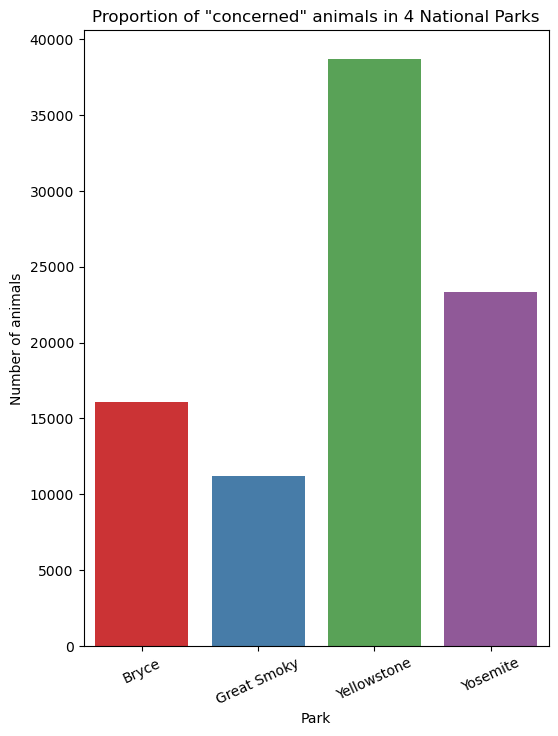

<Figure size 640x480 with 0 Axes>

In [3051]:
plt.figure(figsize=[6,8])
sns.barplot(x='park_name', y='observations', data=concerned_animals)
plt.title(f'Proportion of "concerned" animals in {concerned_animals.park_name.nunique()} National Parks')
plt.xlabel('Park')
plt.ylabel('Number of animals')
plt.xticks(rotation=25)
plt.savefig('bar_concern_anims.png')
plt.show()
plt.clf()

In [3052]:
print('''Result: As expected in Yellowstone the proportion of "concerned" animals is the highest.
This chart follows the previous chart, meaning the ratios are - we can say - the same.''')

Result: As expected in Yellowstone the proportion of "concerned" animals is the highest.
This chart follows the previous chart, meaning the ratios are - we can say - the same.


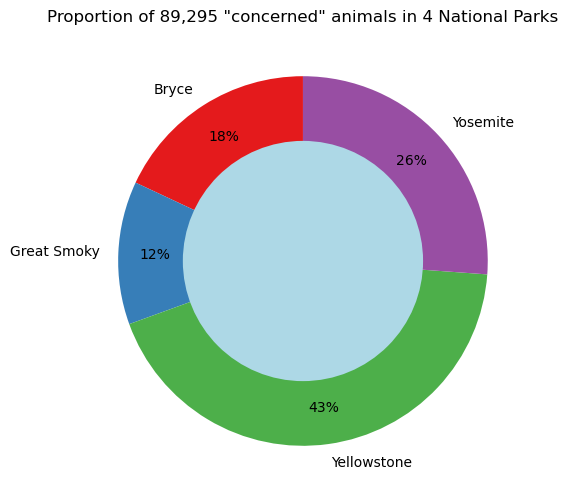

<Figure size 640x480 with 0 Axes>

In [3053]:
plt.figure(figsize=[12, 6])
plt.pie(concerned_animals['observations'], autopct='%d%%', startangle=90, labels=concerned_animals.park_name, pctdistance=0.8)
plt.title(f'Proportion of {concerned_animals.observations.sum():,} "concerned" animals in {len(concerned_animals.park_name)} National Parks')
hole = plt.Circle((0, 0), 0.65, facecolor='lightblue')
plt.gcf().gca().add_artist(hole)
plt.savefig('donut_concern_anims.png')
plt.show()
plt.clf()

In [3054]:
a = np.round(100*concerned_animals.observations.sum()/file1.observations.sum(),2)

In [3055]:
print(f'''Here you can see again the proportions of "concerned" animals of every Park, and you can also find out that {a}% of the
total animals in this sample are "concerned" somehow, which is a measurable number if we recall the total is more than 3 million.''')

Here you can see again the proportions of "concerned" animals of every Park, and you can also find out that 2.69% of the
total animals in this sample are "concerned" somehow, which is a measurable number if we recall the total is more than 3 million.


In [3056]:
newdf_values.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Zizia trifoliata,Yosemite,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
1,Camissonia sierrae ssp. alticola,Bryce,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
2,Tofieldia glabra,Great Smoky,75,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",Species of Concern
3,Accipiter cooperii,Bryce,95,Bird,Cooper's Hawk,Species of Concern
4,Dichanthelium acuminatum var. acuminatum,Yosemite,123,Vascular Plant,Tapered Rosette Grass,Species of Concern


In [3057]:
grouped_cat = newdf_values[['category', 'observations']].groupby('category').sum().reset_index()

In [3058]:
grouped_cat

,category,observations
0,Amphibian,2752
1,Bird,38608
2,Fish,3396
3,Mammal,16449
4,Nonvascular Plant,2705
5,Reptile,2536
6,Vascular Plant,22849


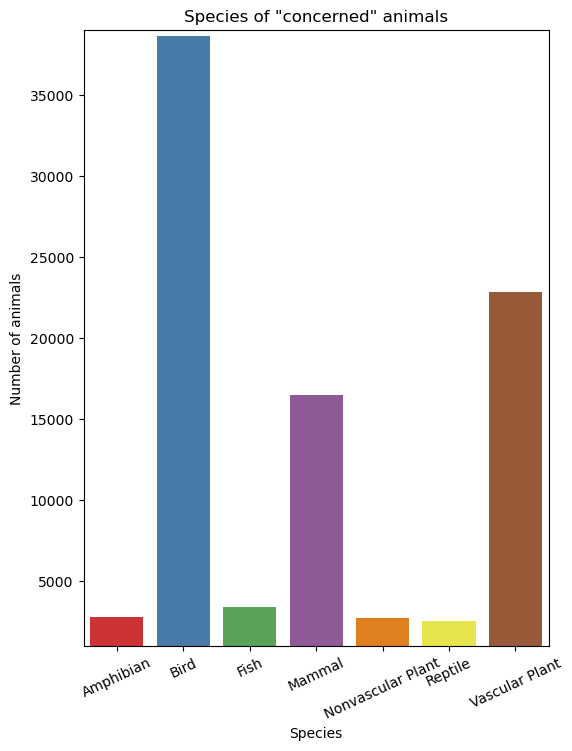

<Figure size 640x480 with 0 Axes>

In [3068]:
plt.figure(figsize=[6, 8])
sns.barplot(x='category', y='observations', data=grouped_cat)
plt.title('Species of "concerned" animals')
plt.xlabel('Species')
plt.ylabel('Number of animals')
plt.xticks(rotation=25)
plt.ylim([1000, 39000])
plt.savefig('bar_concern_species.png')
plt.show()
plt.clf()

In [3060]:
grouped_conserv = newdf_values[['conservation_status', 'observations']].groupby('conservation_status').sum().reset_index()

In [3061]:
grouped_conserv

,conservation_status,observations
0,Endangered,2798
1,In Recovery,1392
2,Species of Concern,82579
3,Threatened,2526


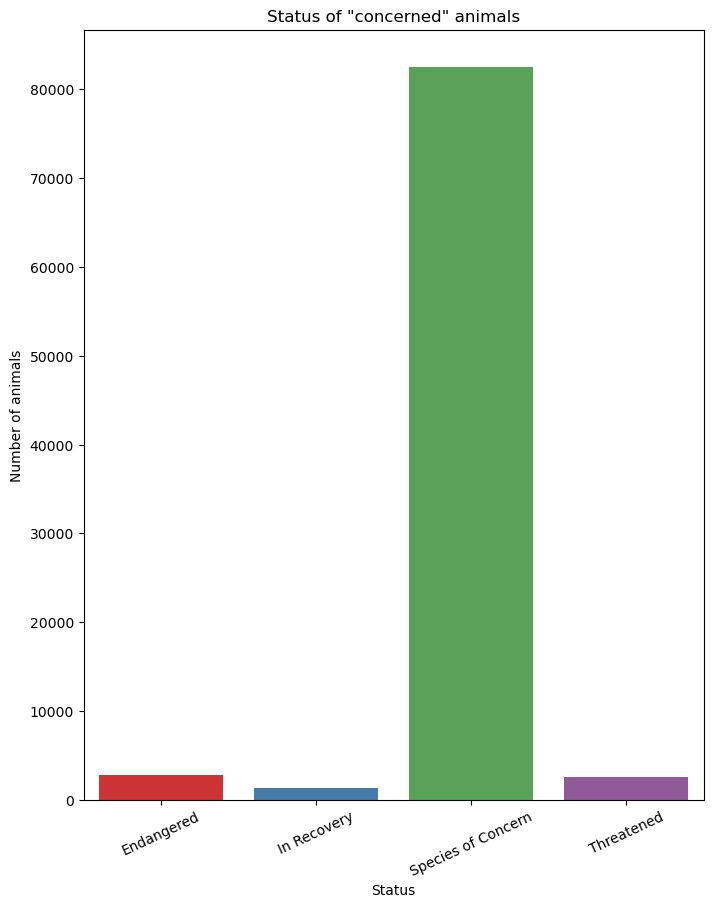

<Figure size 640x480 with 0 Axes>

In [3062]:
plt.figure(figsize=[8,10])
sns.barplot(x='conservation_status', y='observations', data=grouped_conserv)
plt.title('Status of "concerned" animals')
plt.xlabel('Status')
plt.ylabel('Number of animals')
plt.xticks(rotation=25)
plt.savefig('bar_status_concerned.png')
plt.show()
plt.clf()

In [3063]:
grouped_more = newdf_values[['conservation_status', 'category', 'observations']].groupby(['conservation_status', 'category']).sum().reset_index()

In [3064]:
grouped_more

,conservation_status,category,observations
0,Endangered,Amphibian,144
1,Endangered,Bird,574
2,Endangered,Fish,455
3,Endangered,Mammal,1463
4,Endangered,Vascular Plant,162
5,In Recovery,Bird,1392
6,Species of Concern,Amphibian,2044
7,Species of Concern,Bird,36642
8,Species of Concern,Fish,2109
9,Species of Concern,Mammal,14408
